# Visualize Experiment Results
This notebook demonstrates how to use the `ResultHandler` to load experiment results.

In [ ]:
import os
from pathlib import Path

project_root = Path.cwd().parent
if Path.cwd() != project_root:
    os.chdir(project_root)

from src.resultHandler import ResultHandler
import matplotlib.pyplot as plt
from src.utils import SUMMARY_FILE
rh = ResultHandler(SUMMARY_FILE)

folders = rh.get_result_folders()
print(f"Found {len(folders)} result folders.")
folders[:5] 

Loaded result from: results/2025-05-26_17-13-44
Config: {'dataset': {'name': 'Beef'}, 'classifier': {'name': 'catch22'}, 'strategy': {'type': 'length_reduction', 'mode': 'random', 'params': {'reduction_fraction': 0.3}}, 'random_seed': 0}
Metrics: {'accuracy': 0.6, 'f1_score': 0.6031746031746031}


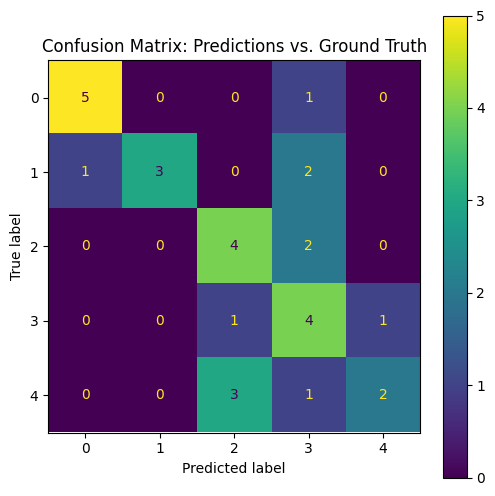

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the first result as an example
folder = folders[0]
result = rh.load_result(folder)
print(f"Loaded result from: {folder}")
print("Config:", result['config'])
print("Metrics:", result['metrics'])

preds = result['preds']
y_test = result['y_test']

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax)
plt.title('Confusion Matrix: Predictions vs. Ground Truth')
plt.show()
